***
**Tutorial 3 for Chapter 2**

Case study 5: Italian Wine Classification by SVMs
***
<font color = 'darkred'>*Reference:*
<font color = 'darkred'>*Python数据挖掘实战*

<!-- Acknowledgement:  
**i2DM (Tan, Steinbach, Kumar (2018) Introduction to Data Mining , 2nd Ed, Pearson )** Pearson Press   -->
For the tutorial course of AMA546 Statistical Data Mining   
Lecturer: Mr. Qiuyi Huang
PolyU, HKSAR

***Contents***

 - Objectives of the analysis
 - Description of the data
 - Exploratory data analysis
  - Data quality (No need in our case)
    - Data Cleaning
    - Data Validation
    - Data Transformation
  - Marginal variable analysis
    - label
    - Scatter plot matrix
    - Boxplot of Alcohol, Flavanoids and Color intensitys
    - Exploring the Relationships using 3D Scatter Plot
  - Data preprocessing
    - Split the training and testing set
 - Model building
 - Model evaluation (based on testing data)
  - Confusion matrices
  - Low-dimensional visualization
 - Summary report
  - Context
  - Objectives
  - Organisation of the data
  - Exploratory data analysis
  - Model specification
  - Model evaluation

In [1]:
import pandas
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib. pyplot as plt 

# Objectives of the analysis
In this case study, we will use the **Support vector machines (SVMs)** to classify the **place of origin of wines**.

The purpose of this study is to help a wine import and export enterprise from China to analyze which region of Italy the imported Italian wine comes from. Although the wines are all from Italy, they can vary in quality and price from region to region. The company want us to help them determine if their Italian supplier had mislabeled the origin place of the wine.

Historical studies have shown that wines from different origins differ in their chemical content. So we can classify the wine by **analyzing the content of chemical components in the wine**.

# Description of the data 
The results of the chemical analysis of our wine are stored in a CSV (comma-separated values) file. Let's load the data first.

In [2]:
### Load data
data_wine = pandas.read_csv('data/SVM.csv')
x = data_wine[[
    'Alcohol', 'Malic acid', 'Ash',
    'Alcalinity of ash','Magnesium',
    'Total phenols', 'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensitys',
    'Hue', 'OD280/OD315 of diluted wines',
    'Proline'
]]
y = data_wine['label']
data_wine.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensitys   Hue  \
0        3.06                  0.28             2.29              5.64  1.04   
1        2.76                  0.26             1.28              4.38  1.05   
2        3.24                  0.30             2.81              5.68  1.03   
3        3.49                  0.24             2.18              7.80  0.86   
4        2.69                  0.39             1.82              4.32  1.04   

   OD280/OD315 of diluted wines  Proline  label  
0                          3.92   1065.0      1  
1                          3.40   1050.0      1  
2                          3.17   1185.0      1  
3                          3.45   1480.0      1  
4                          2.93    735.0      1

In [3]:
# def rstr(df): return df.apply(lambda x: [x.unique()]) # define a function
# rstr(data_wine[['label']])

The dataset contain 14 columns of numerical data and 1 column of categorical data (the "label" column). The 14 numerical columns are chemical measurements taken from 178 samples of wine.
The explanations and range of the features are attached below:

 - **Alcohol (酒精)**: The alcohol content in wine, measured as a percentage of the volume. It is an important factor in the **quality** and **taste** of wine, as well as its effects on **health**.
 - **Malic Acid (苹果酸)**: The malic acid content in wine, measured in grams per liter. It contributes to the **sourness** and **tartness** of wine, and can affect its pH level.
 - **Ash (灰分)**: The ash content in wine, measured in grams per liter. It refers to the inorganic residue left after incineration of organic matter, and can be an indicator of **soil quality** and **grape growing conditions**.
 - **Alcalinity of Ash (灰分碱度)**: The alkalinity of ash content in wine, measured in milliequivalents per liter. It is a measure of the wine's pH buffering capacity, which can affect its **stability** and **taste**.
 - **Magnesium (镁含量)**: The magnesium content in wine, measured in milligrams per liter. It is an essential mineral that contributes to the **flavor** and **aroma** of wine, as well as its **health** benefits.
 - **Total Phenols (总酚)**: The total phenols content in wine, measured in milligrams per liter. Phenols are a class of chemical compounds that contribute to the **color, taste, and aroma** of wine, as well as its **antioxidant** properties.
 - **Flavanoids (黄酮类化合物)**: The flavanoids content in wine, measured in milligrams per liter. Flavanoids are a subclass of phenols that contribute **to the color, taste, and aroma** of wine, as well as its **health** benefits.
 - **Nonflavanoid Phenols (非黄烷类酚类)**: The nonflavanoid phenols content in wine, measured in milligrams per liter. Nonflavanoid phenols are a subclass of phenols that contribute to the **color, taste, and aroma** of wine, as well as its **antioxidant** properties.
 - **Proanthocyanins (原花青素)**: The proanthocyanins content in wine, measured in milligrams per liter. Proanthocyanins are a subclass of flavanoids that contribute to the **color and taste** of wine, as well as its **health** benefits.
 - **Color Intensity (颜色强度)**: The color intensity of wine, measured as the absorbance at 420 nm. It is a measure of the wine's color density, which can be an indicator of its **quality**, **age**, and **grape growing conditions**.
 - **Hue (色调)**: The hue of wine, measured as the angle of the absorbance maximum at 420 nm. It is a measure of the wine's color shade, which can be an indicator of its **grape variety** and **growing conditions**.
 - **OD280/OD315 of Diluted Wines (经稀释后的吸光度比例)**: The OD280/OD315 content in wine, measured as a ratio. It is a measure of the wine's protein content and can be an indicator of its **stability and age**.
 - **Proline (脯氨酸)**: The proline content in wine, measured in milligrams per liter. It is an amino acid that contributes to the **taste and aroma** of wine, as well as its resistance to **stress and disease**.



#  Exploratory data analysis

## Data quality (No need in our case)
Based on the content of last tutorial, we will perform the **[Data Cleaning](https://en.wikipedia.org/wiki/Data_cleansing)**, **[Data Validation](https://en.wikipedia.org/wiki/Data_validation)** and **[Data Transformation](https://en.wikipedia.org/wiki/Data_transformation_(computing))** to check the data quality of the dataset.

### Data Cleaning
 
Our dataset is free of any **`NA`** or **`Null`** values and does not require any cleaning in this regard.

In [4]:
### There is no NA or Null data in the dataframe
print(data_wine[data_wine.isna().any(axis=1)])

Empty DataFrame
Columns: [Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensitys, Hue, OD280/OD315 of diluted wines, Proline, label]
Index: []


### Data Validation
Additionally, we need to assess if there are any outliers in the observations. We mainly detect the outliers by the **data description table** below.

**In dataset `data_wine`**, all of the data appears to be within reasonable bounds and no inconsistencies are immediately noticeable.

In [5]:
### Descriptive statistics
data_wine.describe()

Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color intensitys         Hue  OD280/OD315 of diluted wines  \
count        178.000000  178.000000                    178.000000   
mean           5.058090    0.957449                      2.611685   
std            2.318286    0.228572                      0.709990   
min            1.280000    0.480000                      1.270000   
25%            3.220000    0.782500                      1.937500   
50%            4.690000    0.965000                      2.780000   
75%            6.200000    1.120000                      3.170000   
max           13.000000    1.710000                      4.000000   

           Proline       label  
count   178.000000  178.000000  
mean    746.893258    1.938202  
std     314.907474    0.775035  
min     278.000000    1.000000  
25%     500.500000    1.000000  
50%     673.500000    2.000000  
75%     985.000000    3.000000  
max    1680.000000    3.000000

### Data Transformation

All the data are stored in **double format**. Eventhough the measurement of different features are different, **the SVMs is not sensitive to the measurement**. In conclusion, **there is no need for any data type conversion or data rescaling**.

## Marginal variable analysis

### label
We begin with an analysis of the **possible origin of the wine**. In the dataset we obtained, there are a total of three possible origins of wine, which are denoted by label=1, 2, 3, respectively. Wines from origin 2 has the largest proportion, accounting for 39.9% of all wines. Wines from origin 1 and 3 accounted for 33.1% and 27%, respectively. Overall, the **proportion** of wines from the three countries of origin is **roughly equal**.

In [6]:
# Use crosstab to get the proportion of label
renewal_counts = pandas.crosstab(index=data_wine["label"],
                                 columns="Proportion",
                                 normalize='all') *100
round(renewal_counts,1).astype(str).apply(lambda x:x + '%')

col_0 Proportion
label           
1          33.1%
2          39.9%
3          27.0%

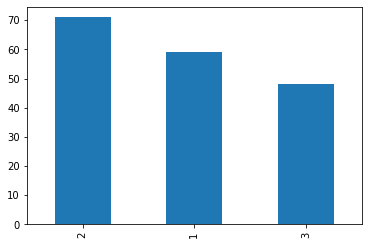

In [7]:
# barplot of the population of wines in different regions
data_wine['label'].value_counts().plot(kind = 'bar'); plt.show()

***
*Due to the large number of explanatory variables, it can be very lengthy to analyze each one. Therefore, we will **analyze all the explanatory variables together**, and **select a few variables of interest to explore in more detail**. The goal of our case study is to classify the region of the wine, so we need to **pay more attention to the relationship between each explanatory variable and the label**. Let's begin with the scatter plot matrix!*
***
### Scatter plot matrix

The **scatter plot matrix** here is a graphical representation of multiple scatter plots in a matrix format. Each **scatter plot** in the matrix represents the **relationship between two variables**. The variables are plotted on the x and y axis, and the data points are represented by dots. The dots are positioned based on the values of the variables. In a scatter plot matrix, each row and column represents a different variable, and the **diagonal plot** represent the **distribution** of each individual variable. The dots and distributions are **colored based on categorical variable `label`**.

Scatter plot matrices can help us **identify outliers** in the data and the **clusters** or **classification rules** that may exist:

<Figure size 57600x57600 with 0 Axes>

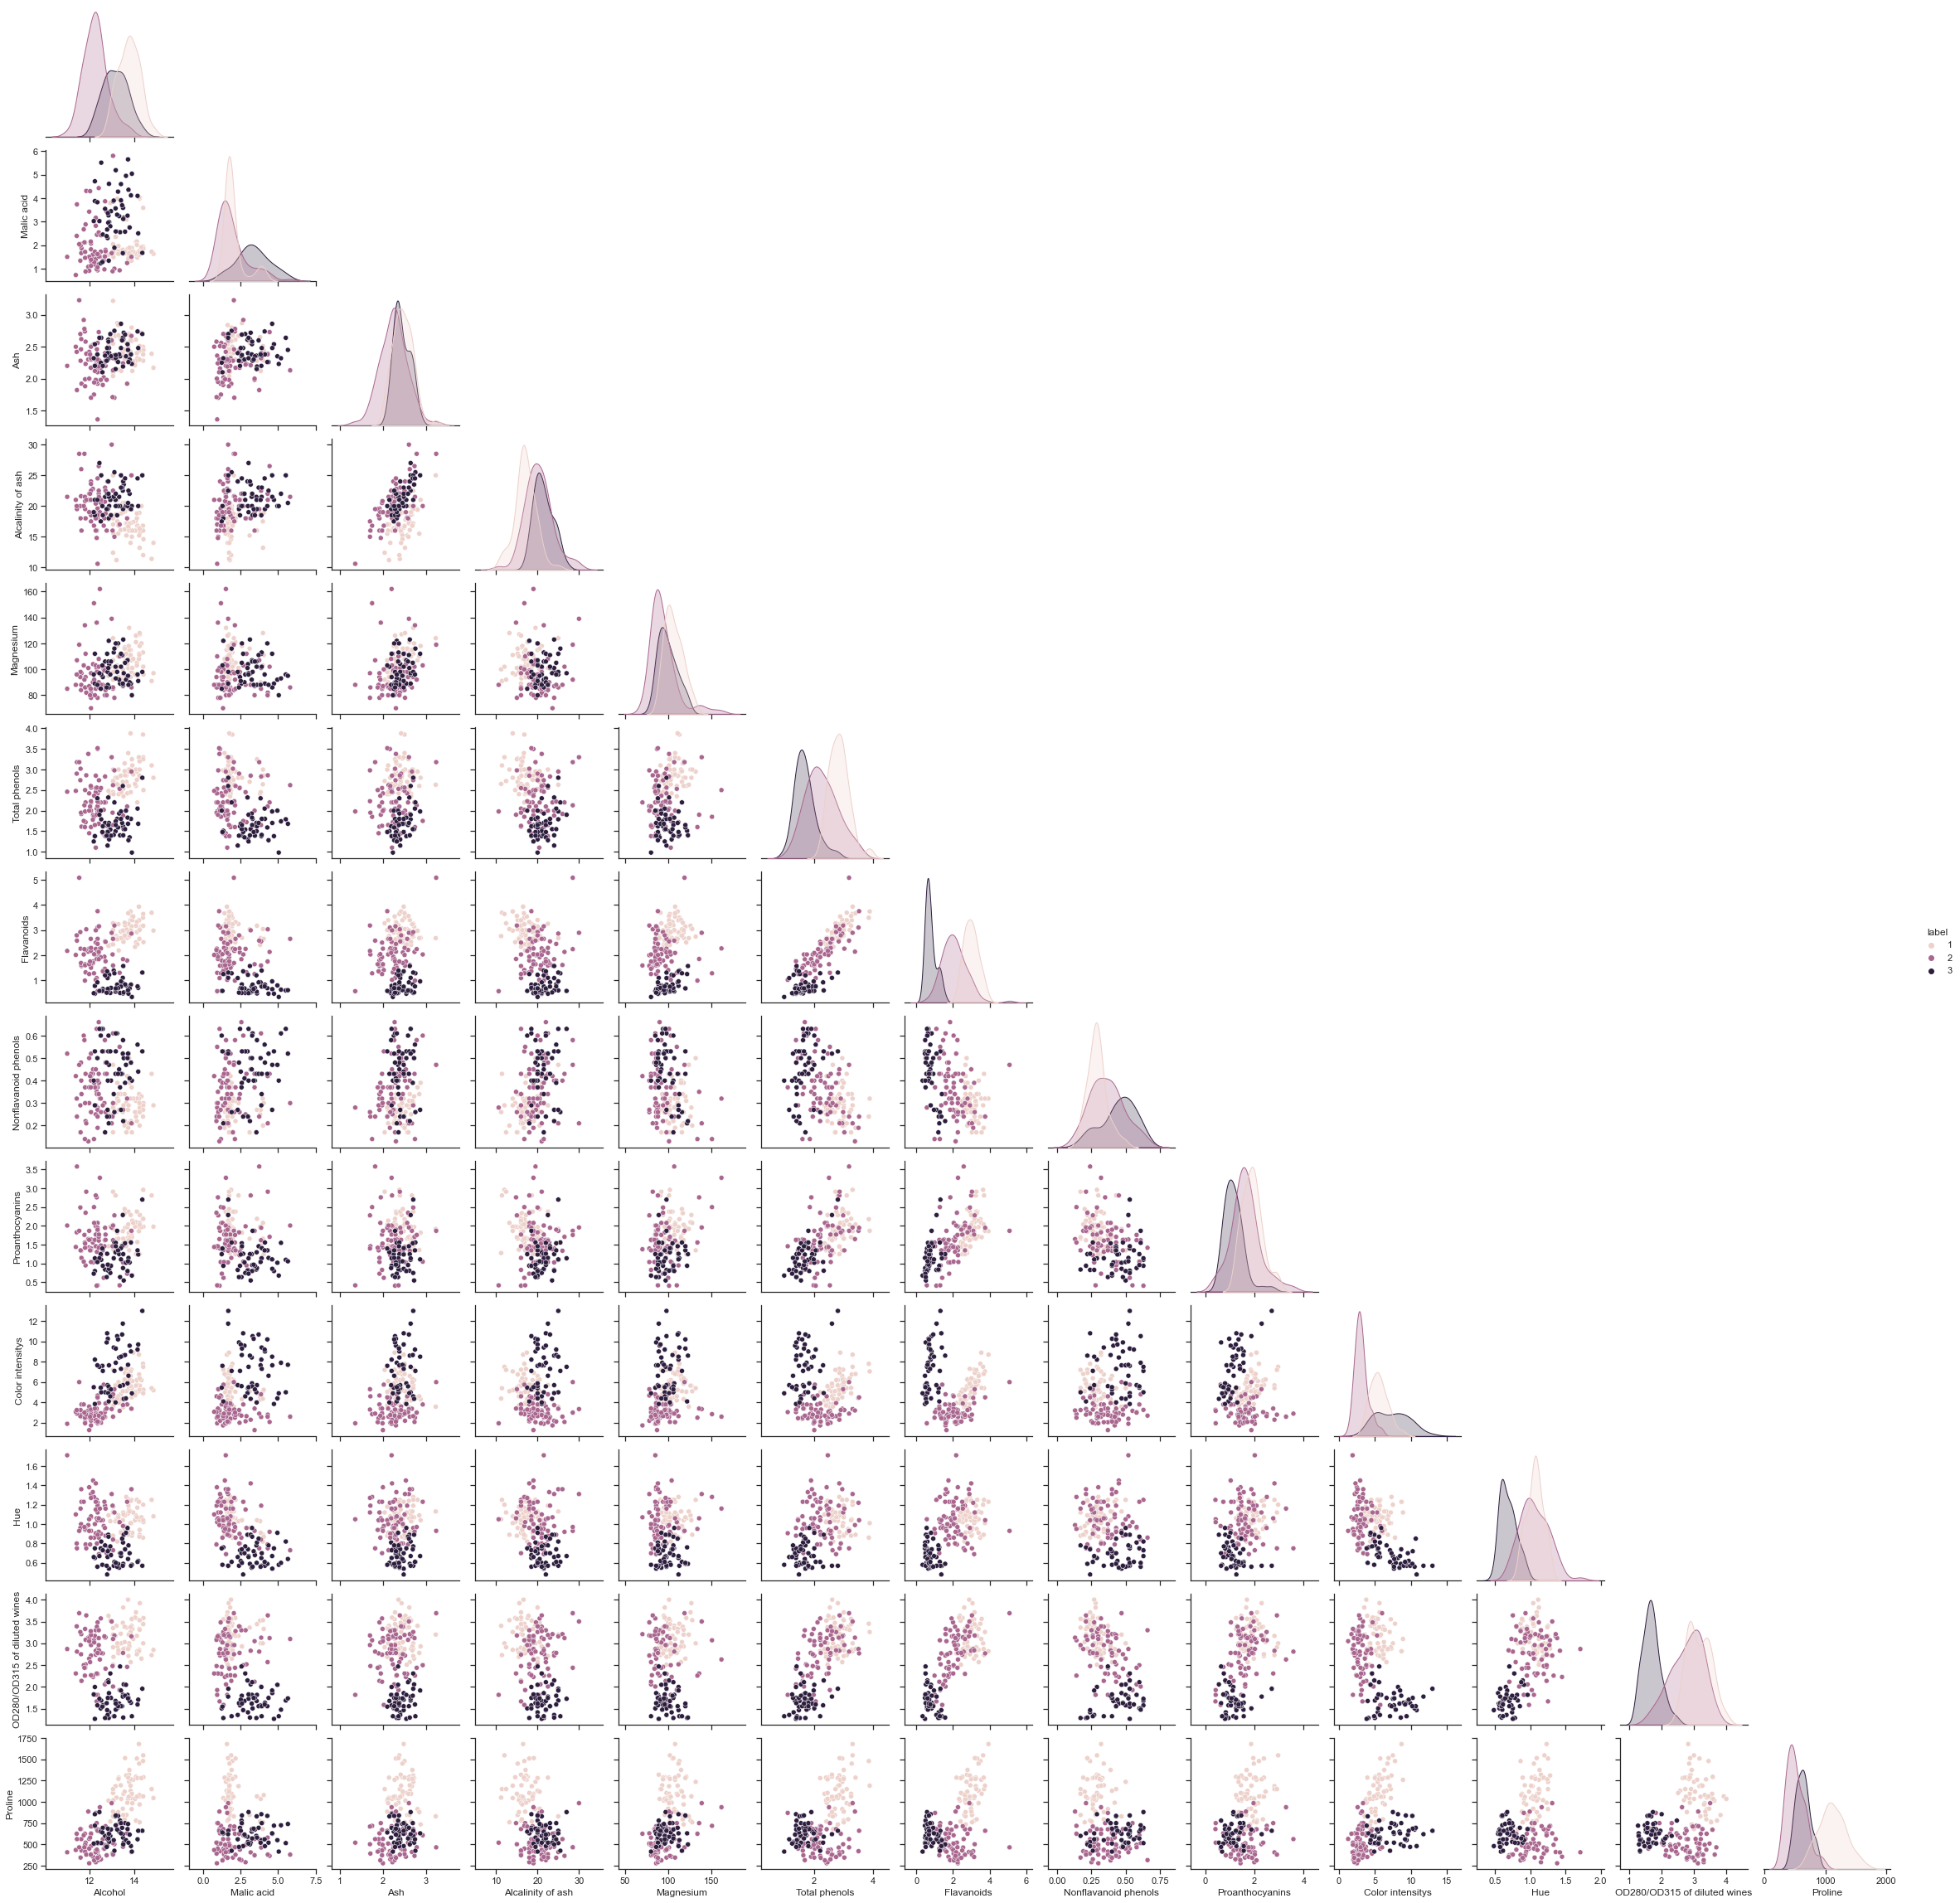

In [8]:
# Scatter plot matrices of explanatory variables
# it takes about 15 secounds to run
sns.set_theme(style="ticks")
plt.figure(figsize=(32, 32), dpi=1800)
sns.pairplot(data_wine, hue="label", corner=True)
plt.show()

*Note that the scatter plot matrix is symmetric, so we'll **plot** only the ones **below the diagonal**.*

All explanatory variables are included in the above scatter plot matrix, and the three colors represent wines from three different origins.

Let us first focus on the **distribution plot on the diagonal**, which shows the distribution of wines from different origins on this variable. If the distribution of wines from different origins on this variable is quite different, then this variable will have a good classification effect. Conversely, if the distributions of wines from different origins overlap heavily on this variable, then this variable will be less discriminative. It can be seen that:
 - `Alcohol`, `Flavanoids` and `Color intensitys`  effectively **distinguish wines from three 
origins**. 
 - `OD280/OD315 of diluted wines`, `Hue` performed well in identifying wines from **region 3** (the darkest),
 - `Color intensitys` worked well for wines from **region 2** (medium dark),
 - the **distribution** of three regions are relatively **concentrated** in `Ash`, `Alcalinity of ash`, `Magnesium`. It seems that the effect of using them alone to perform the classificaiton is relatively poor.

Through the **off-diagonal scatter plot**, we can observe whether the classification task can be completed by **using two variables through the distribution of the scatter points**. Here we select a few scatter plots with good classification effect to introduce:

 - `Alcohol`-`OD280/OD315 of diluted wines` plot in the first column, `Total phenols` - `Color intensitys` plot in the sixth column, `Flavanoids` - `Proline` plot in the seventh column, The `Hue` - `Proline` plot in the penultimate column and the `OD280/OD315 of diluted Wines` - `Proline` plot in the last column show better discrimination of the wines from the three regions.

It's important to note that all of these analyses were performed on one or two variables (**low dimensional**). The SVMs we will use next are for a large number of variables (**high dimensional**).

### Boxplot of Alcohol, Flavanoids and Color intensitys

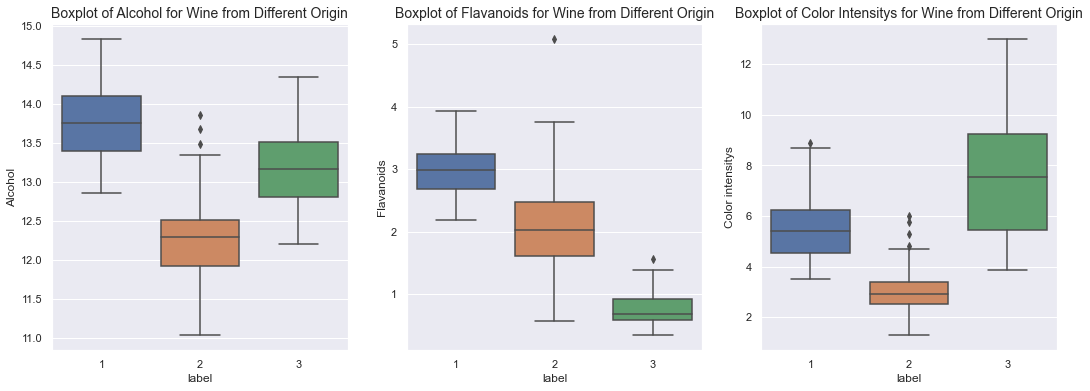

In [9]:
### Boxplot side by side
# Creation of figure with 2 axis
sns.set(style="ticks")
sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
# Creation of 1st axis
sns.boxplot(x="label", y="Alcohol", data=data_wine, ax=ax[0])
ax[0].set_title("Boxplot of Alcohol for Wine from Different Origin", fontsize=14)

# Creation of 2nd axis
sns.boxplot(x="label", y="Flavanoids", data=data_wine, ax=ax[1])
ax[1].set_title("Boxplot of Flavanoids for Wine from Different Origin", fontsize=14)

# Creation of 3nd axis
sns.boxplot(x="label", y="Color intensitys", data=data_wine, ax=ax[2])
ax[2].set_title("Boxplot of Color Intensitys for Wine from Different Origin", fontsize=14)

# Close the empty Figure 2 created by seaborn.
plt.close(2)

The variables `Alcohol`, `Flavanoids` and `Color intensitys` have a **clear classification effect in distribution**. Although the boxes of the boxplot barely overlap in all three variables (except for origins 1 and 3 on the `Color intensitys variable`). The **overlap between their lower and upper whisker is severe**, and wines from origin 2 show outliers in all three variables. This suggests that **it is not appropriate to rely on a single variable** for classification.

### Exploring the Relationships using 3D Scatter Plot
The plot below is **interactive** with the mouse. You can inspect the internal structure of the 3D scatter plot by trying to zoom or rotate it. Since the variables `Alcohol`, `Flavanoids` and `Color intensitys` have obvious classification effects, we try to plot these three dimensions in a 3D Scatter Plot:

In [10]:
import plotly.express as px
fig = px.scatter_3d(data_wine, x='Alcohol', y='Flavanoids', z='Color intensitys',
              color='label')
fig.show()

Wines from different regions are labeled by different colors. It can be seen that although any one variable cannot completely distinguish the wines of different origins, we can make a **good classification by using three variables altogether**.

**Conclustion:**
In **Marginal variable analysis**, we draw a series of plots to explore the effect of different variables on the classification of wines from different origins.
 - The **Barplot of `label`** confirms that the distribution of label is relatively uniform.
 - The **Scatter plot matrix** analyse the explanatory variables:
     - for **single variable**, `Alcohol`, `Flavanoids` and `Color intensitys` have a good effect on distinguishing wines from different origins, which is further confirmed by boxplots. 
     - for **two variables**, `Alcohol`-`OD280/OD315 of diluted wines``Total phenols` - `Color intensitys`, `Flavanoids` - `Proline`, `Hue` - `Proline`, `OD280/OD315 of diluted Wines` - `Proline` has a **good distinguishing effect** on wines from different origins.
 - Finally, we explore the classification effect of the combination of **three variables** `Alcohol` , `Flavanoids` and `Color intensitys` by 3D Scatter Plot. We find that wines from different regions are **better separated** in the 3D Scatter Plot of these three variables.

## Data preprocessing
The type of the data in the dataset is double, eliminating the need for additional preprocessing. The only required step is to **split the data into training and testing sets** to establish the SVMs.

### Split the training and testing set

In [11]:
# Split the dataset into training set (70%) and testing set (30%), the random_state is used to control randomness
from sklearn.model_selection import train_test_split # Import the training and testing dataset splitter
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Model building 
We will use the SVMs to build the classification model. 

**Support Vector Machines (SVMs)** is a popular supervised machine learning algorithm used for classification and regression problems. SVM works by finding the **maximum margin hyperplane in a high-dimensional space** that separates the data into classes. This **hyperplane is called the decision boundary**, and the **points closest to the decision boundary are called support vectors**.
<img src='https://pica.zhimg.com/v2-c0e7baaa36361af402ff079d6f92e97c_1440w.jpg?source=172ae18b' width=400>

One of the key features of SVM is its ability to handle **non-linearly separable data** through the use of different **kernel functions**. The kernel functions transform the input data into a **higher dimensional space**, where it becomes possible to **separate the classes linearly**. ( It means the classes can be separated by a hyperplane.) Eventhough it is not linearly separatable in the lower dimension, as what we observed in the 3D scatter plot above.
<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*zWzeMGyCc7KvGD9X8lwlnQ.png' width=400>

The four main types of kernels in SVM are:

1. **Linear Kernel**: The linear kernel is the simplest and most straightforward kernel function. It projects the data into a higher dimensional space where it becomes linearly separable. The linear kernel is used when the data is **already linearly separable** in the original space. It is defined as:  
$$K(x_i, x_j) = x_i^T x_j$$  
where $x_i$ and $x_j$ are the input data points.

2. **Polynomial Kernel**: The polynomial kernel is used when the data is **not linearly separable** in the original space. It maps the data into a higher dimensional space where it becomes linearly separable. The polynomial kernel is defined as:  
$$K(x_i, x_j) = (x_i^T x_j + c)^d$$  
where $c$ and $d$ are hyperparameters that control the degree of the polynomial.

3. **Radial Basis Function (RBF) Kernel**: The RBF kernel is a popular kernel function used in SVM. It maps the data into an infinite dimensional space where it becomes linearly separable. The RBF kernel is especially useful when the data is **not linearly separable** in the original space and has a **complex decision boundary**. The RBF kernel is defined as:  
$$K(x_i, x_j) = \exp(-\gamma |x_i - x_j|^2)$$
where $\gamma$ is a hyperparameter that controls the width of the Gaussian kernel. 


4. **Sigmoid Kernel**: The sigmoid kernel is used when the data is **not linearly separable** in the original space.      It maps the data into a higher dimensional space where it becomes linearly separable. The sigmoid kernel is used in **binary classification** problems and is **similar to the logistic regression**. The sigmoid kernel is defined as:  
$$K(x_i, x_j) = \tanh(\alpha x_i^T x_j + c)$$  
where $\alpha$ and $c$ are hyperparameters that control the shape of the sigmoid function.

<!-- In conclusion, SVM is a versatile machine learning algorithm that can handle both linear and non-linear data.      **The choice of kernel function depends on the nature of the data and the problem being solved**. The **linear kernel** is used when the data is **already linearly separable**, while the **polynomial, RBF, and sigmoid kernels** are used when the data is **not linearly separable**. -->

However, the input data may not be linearly separatable even after transformed into the higher dimensional space. Therefore, we need to set a **soft margin** which **allowed some observations to be misclassified**. The **regularization parameter C** is a hyperparameter that controls the trade-off between margin size and classification accuracy. The objective function for the SVC is defined as: (***the formular is the same as the one in page 462 in out textbook i2DM***)

$$\min_{w,b,\xi} \frac{1}{2}||w||^2 + C \sum_{i=1}^n \xi_i$$
subject to:
$$y_i(w^Tx_i + b) \geq 1 - \xi_i$$
$$\xi_i \geq 0$$

where $w$ and $b$ are the parameters of the hyperplane, $\xi_i$ is a slack variable that allows for some points to be on the wrong side of the margin, and $C$ is the regularization parameter. The objective function minimizes the margin size and the sum of the slack variables, subject to the constraint that all data points are classified correctly. A **small value of C** leads to a **larger margin and more misclassified points**, while a **large value of C** leads to a **smaller margin and fewer misclassified points**.
<img src='https://i.stack.imgur.com/GbW5S.png' width=400>

In addition, we aim to divide wines into **3 categories**. In its most simple type, **SVM doesn’t support multiclass classification natively**. It supports binary classification and separating data points into two classes. For multiclass classification, the same principle is utilized after breaking down the multiclassification problem into multiple binary classification problems.    There are two approaches:

 - **One-to-One approach**: In the One-to-One approach, we need a hyperplane to separate between every two classes, **neglecting the points of the third class**. This means the separation takes into account only the points of the two classes in the current split. For example, the red-blue line tries to maximize the separation only between blue and red points. It has nothing to do with green points:
 <img src='https://www.baeldung.com/wp-content/uploads/sites/4/2020/10/multiclass-svm2-e1601952762246.png' width = 300>
 - **One-to-Rest approach**: In the One-to-Rest approach, we need a hyperplane to **separate between a class and all others at once**.  This means the separation takes all points into account, dividing them into two groups;  a group for the class points and a group for all other points.  For example, the green line tries to maximize the separation between green points and all other points at once:
 <img src='https://www.baeldung.com/wp-content/uploads/sites/4/2020/10/multiclass-svm3-e1601952776445.png' width = 300>
 
In our analysis below, we will use the **C-Support Vector Machine Classification** with default $C=1$ and One-to-Rest approach (default in [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) package). The Grid search is applied to search the best kernel and degree of the SVMs. The **cross-validation** is used to evaluate the performance of different kernels.

In [12]:
### Finding the Best Parameters for SVM with Grid Search"
# Create a KNN classifier object
svc = SVC(probability=True)
# Find the optimal parameters by Grid search
def svm_grid_search(svc, kernel):
    paramGrid = dict(
        kernel=kernel
    )
    # evaluate the performance of the model with each combination of the given parameters
    gridSearchCV = GridSearchCV(
        svc, paramGrid, 
        cv=3,  # 3-fold cross-validation
        verbose=1,  # print messages about the progress of the search to the console
        n_jobs=5,  # parallel processing (n_jobs=5)
        return_train_score=True
    )
    return gridSearchCV  # store the best parameters for the model.

# fit the model with the best parameters
grid = svm_grid_search(svc, kernel=['linear', 'poly', 'rbf', 'sigmoid']).fit(x_train, y_train)
# prints the best score obtained by the grid search
print('The best score is: %f' % grid.best_score_)
# the best parameters of the model found by the grid search
print('The best parameters are:')
for key in grid.best_params_.keys():
    print('%s=%s'%(key, grid.best_params_[key]))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
The best score is: 0.935346
The best parameters are:
kernel=linear


We use grid search to **evaluate SVMs with `linear`, `poly`, `rbf`, and `sigmoid` kernels.** According to the output, the grid search evaluated 4 combinations of hyperparameters  by 3-fold cross-validation, resulting in a total of 12 fits.

The highest mean score (across all folds) was achieved using the **`linear` kernel**, with a **mean score of 0.935346**. The score represents the accuracy of the SVM classifier on the test data.

*Recall*:

*Accuracy measures how often the model makes the correct prediction.*
 $$ \text{Accuracy} = \frac{\text{True Positives + True Negatives}}{\text{True Positives + True Negatives + False Positives + False Negatives}} $$

# Model evaluation (based on testing data)

## Confusion matrices
For **three-class classification problem**, unlike for two-class classification problem, we cannot use ROC curve and AUC to evaluate its effectiveness. Instead, we use a confusion matrix to analyze the classification results. The confusion matrix here is a matrix is presented as a 3x3 table for ternary classification problems,  where classes are 0, 1 and 2. The **rows** in the table represent the **actual** class,  while the **columns** represent the **predicted** class.

In [13]:
# Define a function to calculate the confusion matrix
from sklearn.metrics import confusion_matrix # import confusion matrix module
def calculate_confusion_matrix(y_true, y_pred, labels):
    confu_mat = pandas.DataFrame(confusion_matrix(y_true, y_pred,
                                                  normalize=None,  # calculate the proportion
                                                  labels=labels))  # pos label = True
    return round(confu_mat, 2).astype(str)  # formatting the output
# Confusion matrix of KNN mdel with k=17
calculate_confusion_matrix(y_test, grid.predict(x_test), labels=[1, 2, 3])

0   1   2
0  23   0   0
1   1  18   0
2   0   1  11

In the confusion matrix above, the classifier achieves **excellent classification results**. **Except for two misclassification, no errors occurred**. This is because the data is almost linearly separable in the original space, and only a simple linear kernel is needed to separate them.

Note that **the Accuracy of the model will be** $\frac{52}{54} = 0.9630$. The best score showed above is the mean score calculated by cross-validation, which is a little lower.

## Low-dimensional visualization
Due to the high dimension of explanatory variables in this case study, it is difficult for us to fully show the classification situation of SVMs. Thus, we still display the classification results in low-dimentional plots. The **3D plot formed by `Alcohol`, `Flavanoids` and `Color intensitys`**. The points with different colors indicate the wine regions predicted by the optimal SVM classifier. Since **this is just a low-dimensional plot**, most of the **points scattered in the high-dimensional space** are **overlaped in the plot**. In addition, because our SVM classifier uses **soft margin**, even a simple linear kernel svm classifier works well.

You may discover that pattern of the plot below is very similar to the 3D plot in the Marginal variable analysis. Actually, there is **only two misclassification exists**.

In [14]:
# Creation of 2nd axis
px.scatter_3d(x_test, x='Alcohol', y='Flavanoids', z='Color intensitys',
              color=grid.predict(x_test))

In addition, we plot the SVM classification and the decision boundary using the variables `Alcohol` and `Flavanoids`. The **colors of the scatter points in the plot represent their actual origin**, while the **colors of the regions represent the classification criteria** of the SVM classifier.

In [15]:
### Plot the SVM classification and decision boundary of w.r.t. the Alcohol and Flavanoids
h = .02  # step size in the mesh
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
x = x_test; y = y_test
svc1 = SVC(kernel='linear', C=C).fit(x, y)  # fit the linear kernel SVM model with the input data

# create a mesh to plot in
x_min, x_max = x.loc[:,'Alcohol'].min() - 1, x.loc[:,'Alcohol'].max() + 1
y_min, y_max = x.loc[:,'Flavanoids'].min() - 1, x.loc[:,'Flavanoids'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
svc1 = SVC(kernel='linear', C=C).fit(x.loc[:,['Alcohol','Flavanoids']], y)
Z = svc1.predict(np.c_[xx.ravel(), yy.ravel()])  # predict the class labels for all points

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.autumn_r, alpha=0.8)

# Plot also the training points
plt.scatter(x.loc[:,'Alcohol'], x.loc[:,'Flavanoids'], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('The SVM Classification and Decision Boundary of w.r.t. the Alcohol and Flavanoids')

NameError: name 'np' is not defined

 You can see that the **decision boundary has three hyperplanes (since it is a multi-classification problem)**. Since this is just a projection of a low-dimensional space, some points are misclassified. Most of the points are correctly identified in high dimentional space.

# Summary report
## Context
This study aims to help a wine import and export company from China to **classify imported wines**. We use **SVMs (Support Vector Machines)** and make predictions based on the chemical composition of the wine. These analyses will help company managers to select their suppliers.

## Objectives
The purpose of this study is to help a wine import and export enterprise from China to analyze which region of Italy the imported Italian wine comes from.

## Organisation of the data
The dataset contain 14 columns of numerical data and 1 column of categorical data (the label column). The 14 numerical columns are chemical measurements taken from 178 samples of wine. The explanatory variables including Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensitys, Hue, OD280/OD315 of diluted wines and Proline.

## Exploratory data analysis
In the Exploratory data analysis, we check the data quality by doing Data Cleaning, Data Validation and Data Transformation. The we perform the Marginal variable analysis, we draw a series of plots to explore the effect of different variables on the classification of wines from different origins.
 - The **Barplot of `label`** confirms that the distribution of label is relatively uniform.
 - The **Scatter plot matrix** analyse the explanatory variables:
     - for a single variable, `Alcohol`, `Flavanoids` and `Color intensitys` have a good effect on distinguishing wines from different origins, which is further confirmed by boxplots. 
     - for both variables, `Alcohol`-`OD280/OD315 of diluted wines``Total phenols` - `Color intensitys`, `Flavanoids` - `Proline`, `Hue` - `Proline`, `OD280/OD315 of diluted Wines` - `Proline` has a good distinguishing effect on wines from different origins.
 - Finally, we explore the classification effect of the combination of three variables `Alcohol` , `Flavanoids` and `Color intensitys` by 3D Scatter Plot. We find that wines from different regions are better separated in the 3D Scatter Plot of these three variables.

##  Model specification
The objective of our analysis is to propose a predictive classification model that divides the wines into three regions. The features of the data set are **continuous** variables. Therefore, we consider using **C-Support Vector Machine Classification with $C=1$ and One-to-Rest approach**.

## Model evaluation
We partition about 30% of the observations into the test dataset. In model evaluation, a sample with label=2 out of 54 samples is predicted as label=1 and a sample with label=3 is predicted as label=2. The model predicts very well, with an **Accuracy of 0.9630** on the test set.